 **<h1 align="middle"><font color="blue"> HR Data Analytics for Business Decision-Making (MNC Project) </font></h1>**


##**Importing Libraries**

In [4]:
pip install --upgrade plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [3]:
!pip install squarify


In [5]:
import numpy as np
import pandas as pd
import os
import squarify
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [8]:
hr_data = pd.read_csv("/content/HR_Data_MNC.csv")

In [9]:
hr_data.head(10)

Unnamed: 0 Employee_ID        Full_Name  Department              Job_Title  \
0           0  EMP0000001    Joshua Nguyen          IT      Software Engineer   
1           1  EMP0000002   Julie Williams   Marketing         SEO Specialist   
2           2  EMP0000003  Alyssa Martinez          HR             HR Manager   
3           3  EMP0000004  Nicholas Valdez          IT      Software Engineer   
4           4  EMP0000005   Joel Hendricks  Operations  Logistics Coordinator   
5           5  EMP0000006    Jason Gardner  Operations  Logistics Coordinator   
6           6  EMP0000007     Julie Wright     Finance        Finance Manager   
7           7  EMP0000008     Scott Wilson       Sales        Account Manager   
8           8  EMP0000009   Cathy Thompson     Finance      Financial Analyst   
9           9  EMP0000010      Maria Yu MD          IT      Software Engineer   

    Hire_Date                                 Location  Performance_Rating  \
0  2011-08-10                       Isaacland, Denmark                 5.0   
1  2018-03-02                  Anthonyside, Costa Rica                 2.0   
2  2023-03-20         Port Christinaport, Saudi Arabia                 1.0   
3  2023-10-12  Port Shelbychester, Antigua and Barbuda                 1.0   
4  2024-12-09     Lake Kimberly, Palestinian Territory                 5.0   
5  2021-02-23                  Zimmermanstad, Bulgaria                 5.0   
6  2016-04-04                  Karenfort, South Africa                 2.0   
7  2020-04-04      Moniqueview, British Virgin Islands                 2.0   
8  2018-05-29                  South Catherine, Belize                 4.0   
9  2015-10-08                         Brownport, Yemen                 4.0   

   Experience_Years    Status Work_Mode  Salary_INR  
0              14.0  Resigned   On-site   1585363.0  
1               7.0    Active   On-site    847686.0  
2               2.0    Active   On-site   1430084.0  
3               1.0    Active   On-site    990689.0  
4               0.0    Active   On-site    535082.0  
5               4.0    Active   On-site    641393.0  
6               9.0    Active   On-site   1383891.0  
7               5.0    Active    Remote    423091.0  
8               7.0  Resigned    Remote   1138452.0  
9               9.0    Active    Remote   1543102.0

In [10]:
hr_data.shape

(86754, 12)

In [11]:
print(hr_data.info(), "\n")
print(hr_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86754 entries, 0 to 86753
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          86754 non-null  int64  
 1   Employee_ID         86754 non-null  object 
 2   Full_Name           86754 non-null  object 
 3   Department          86754 non-null  object 
 4   Job_Title           86754 non-null  object 
 5   Hire_Date           86753 non-null  object 
 6   Location            86753 non-null  object 
 7   Performance_Rating  86753 non-null  float64
 8   Experience_Years    86753 non-null  float64
 9   Status              86753 non-null  object 
 10  Work_Mode           86753 non-null  object 
 11  Salary_INR          86753 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 7.9+ MB
None 

Unnamed: 0            0
Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date       

In [12]:
hr_data.count()

Unnamed: 0            86754
Employee_ID           86754
Full_Name             86754
Department            86754
Job_Title             86754
Hire_Date             86753
Location              86753
Performance_Rating    86753
Experience_Years      86753
Status                86753
Work_Mode             86753
Salary_INR            86753
dtype: int64

In [13]:
hr_data.columns

Index(['Unnamed: 0', 'Employee_ID', 'Full_Name', 'Department', 'Job_Title',
       'Hire_Date', 'Location', 'Performance_Rating', 'Experience_Years',
       'Status', 'Work_Mode', 'Salary_INR'],
      dtype='object')

In [14]:
hr_data.columns = hr_data.columns.str.upper()

In [15]:
hr_data

UNNAMED: 0 EMPLOYEE_ID           FULL_NAME  DEPARTMENT  \
0               0  EMP0000001       Joshua Nguyen          IT   
1               1  EMP0000002      Julie Williams   Marketing   
2               2  EMP0000003     Alyssa Martinez          HR   
3               3  EMP0000004     Nicholas Valdez          IT   
4               4  EMP0000005      Joel Hendricks  Operations   
...           ...         ...                 ...         ...   
86749       86749  EMP0086750       Heather Price          HR   
86750       86750  EMP0086751        Robert Jones     Finance   
86751       86751  EMP0086752         Erica Brown       Sales   
86752       86752  EMP0086753  Kathleen Mccormick          IT   
86753       86753  EMP0086754      Rebecca Wilson         R&D   

                   JOB_TITLE   HIRE_DATE  \
0          Software Engineer  2011-08-10   
1             SEO Specialist  2018-03-02   
2                 HR Manager  2023-03-20   
3          Software Engineer  2023-10-12   
4      Logistics Coordinator  2024-12-09   
...                      ...         ...   
86749            HR Director  2018-03-24   
86750      Financial Analyst  2024-06-18   
86751        Sales Executive  2015-11-13   
86752      Software Engineer  2025-02-06   
86753         Lab Technician         NaN   

                                      LOCATION  PERFORMANCE_RATING  \
0                           Isaacland, Denmark                 5.0   
1                      Anthonyside, Costa Rica                 2.0   
2             Port Christinaport, Saudi Arabia                 1.0   
3      Port Shelbychester, Antigua and Barbuda                 1.0   
4         Lake Kimberly, Palestinian Territory                 5.0   
...                                        ...                 ...   
86749            Lake Josephberg, Sierra Leone                 4.0   
86750                        Erinmouth, Tuvalu                 2.0   
86751         South Virginia, Christmas Island                 5.0   
86752               Lake Terri, Cayman Islands                 5.0   
86753                                      NaN                 NaN   

       EXPERIENCE_YEARS    STATUS WORK_MODE  SALARY_INR  
0                  14.0  Resigned   On-site   1585363.0  
1                   7.0    Active   On-site    847686.0  
2                   2.0    Active   On-site   1430084.0  
3                   1.0    Active   On-site    990689.0  
4                   0.0    Active   On-site    535082.0  
...                 ...       ...       ...         ...  
86749               7.0    Active    Remote   1019554.0  
86750               1.0    Active    Remote   1465772.0  
86751               9.0    Active   On-site    874900.0  
86752               0.0   Retired    Remote   1388124.0  
86753               NaN       NaN       NaN         NaN  

[86754 rows x 12 columns]

In [16]:
# Rename the column
hr_data.rename(columns={'UNNAMED: 0': 'SI.'}, inplace=True)

In [17]:
# Verify the change
hr_data.head()

SI. EMPLOYEE_ID        FULL_NAME  DEPARTMENT              JOB_TITLE  \
0    0  EMP0000001    Joshua Nguyen          IT      Software Engineer   
1    1  EMP0000002   Julie Williams   Marketing         SEO Specialist   
2    2  EMP0000003  Alyssa Martinez          HR             HR Manager   
3    3  EMP0000004  Nicholas Valdez          IT      Software Engineer   
4    4  EMP0000005   Joel Hendricks  Operations  Logistics Coordinator   

    HIRE_DATE                                 LOCATION  PERFORMANCE_RATING  \
0  2011-08-10                       Isaacland, Denmark                 5.0   
1  2018-03-02                  Anthonyside, Costa Rica                 2.0   
2  2023-03-20         Port Christinaport, Saudi Arabia                 1.0   
3  2023-10-12  Port Shelbychester, Antigua and Barbuda                 1.0   
4  2024-12-09     Lake Kimberly, Palestinian Territory                 5.0   

   EXPERIENCE_YEARS    STATUS WORK_MODE  SALARY_INR  
0              14.0  Resigned   On-site   1585363.0  
1               7.0    Active   On-site    847686.0  
2               2.0    Active   On-site   1430084.0  
3               1.0    Active   On-site    990689.0  
4               0.0    Active   On-site    535082.0

In [18]:
hr_data.count()

SI.                   86754
EMPLOYEE_ID           86754
FULL_NAME             86754
DEPARTMENT            86754
JOB_TITLE             86754
HIRE_DATE             86753
LOCATION              86753
PERFORMANCE_RATING    86753
EXPERIENCE_YEARS      86753
STATUS                86753
WORK_MODE             86753
SALARY_INR            86753
dtype: int64

In [19]:
hr_data.describe()

SI.  PERFORMANCE_RATING  EXPERIENCE_YEARS    SALARY_INR
count  86754.000000        86753.000000      86753.000000  8.675300e+04
mean   43376.500000            3.004784          5.026097  8.951380e+05
std    25043.866964            1.414780          3.615067  4.007010e+05
min        0.000000            1.000000          0.000000  3.002550e+05
25%    21688.250000            2.000000          2.000000  6.154810e+05
50%    43376.500000            3.000000          5.000000  8.103920e+05
75%    65064.750000            4.000000          8.000000  1.072905e+06
max    86753.000000            5.000000         15.000000  2.997010e+06

# 1. What is the distribution of Employee Status (Active, Resigned, Retired, Terminated)?

In [20]:
# Check unique values in STATUS column
hr_data['STATUS'].value_counts()


STATUS
Active        60770
Resigned      17205
Retired        4453
Terminated     4325
Name: count, dtype: int64

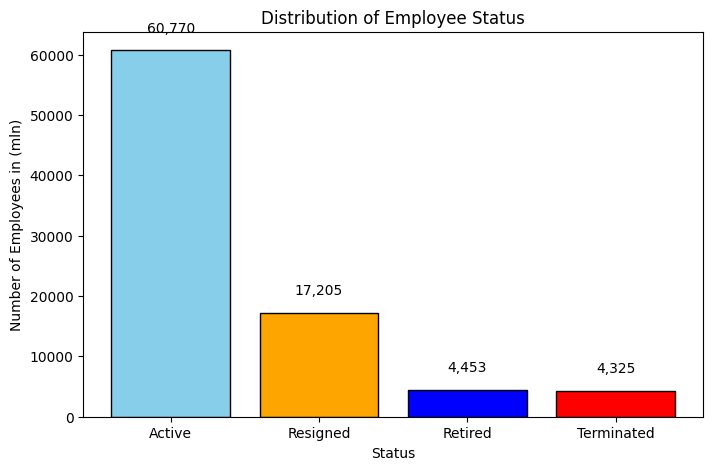

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

status_counts = hr_data['STATUS'].value_counts()
colors = ['skyblue', 'orange', 'blue', 'red']

plt.figure(figsize=(8,5))
bars = plt.bar(status_counts.index, status_counts.values, color=colors, edgecolor='black')

# Add values on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2500, f'{height:,}', ha='center', va='bottom')

# Format y-axis to show normal numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.title('Distribution of Employee Status')
plt.xlabel('Status')
plt.ylabel('Number of Employees in (mln)')
plt.xticks(rotation=0)
plt.show()


In [22]:
import plotly.express as px

# Prepare the value counts
status_counts = hr_data['STATUS'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']  # Rename columns properly

# Plot
fig = px.bar(status_counts,
             x='Status',
             y='Count',
             title='Distribution of Employee Status',
             color='Status',
             text='Count')  # Show counts on bars

fig.show()


# 2. What is the distribution of work modes (On-site, Remote)?

In [23]:
# Check unique work modes and counts
hr_data['WORK_MODE'].value_counts()


WORK_MODE
On-site    51795
Remote     34958
Name: count, dtype: int64

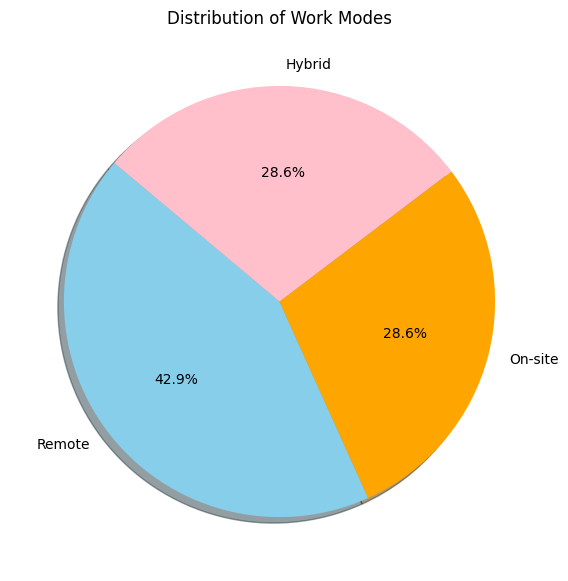

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataset (you can replace with your actual data)
data = ['Remote', 'On-site', 'Hybrid', 'Remote', 'Remote', 'Hybrid', 'On-site']

# Count occurrences of each work mode
work_mode_counts = pd.Series(data).value_counts()

# Define colors (adjust if categories differ)
colors = ['skyblue', 'orange', 'pink']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(work_mode_counts,
        labels=work_mode_counts.index,
        autopct='%1.1f%%',   # Show percentage with 1 decimal
        startangle=140,
        colors=colors,
        shadow=True)

plt.title('Distribution of Work Modes')
plt.show()


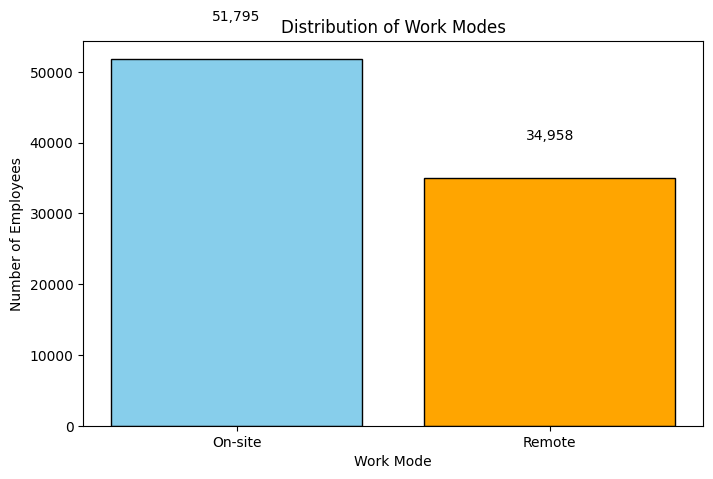

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Count of each work mode
work_mode_counts = hr_data['WORK_MODE'].value_counts()

# Define colors for each work mode
colors = ['skyblue', 'orange', 'green']  # Adjust based on number of categories

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(work_mode_counts.index, work_mode_counts.values, color=colors, edgecolor='black')

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5000, f'{height:,}', ha='center', va='bottom')

# Format y-axis to show normal numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.title('Distribution of Work Modes')
plt.xlabel('Work Mode')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()


# 3. How many employees are there in each department?


In [26]:
# Count of employees in each department
department_counts = hr_data['DEPARTMENT'].value_counts()

# Display counts
print(department_counts)


DEPARTMENT
IT            25934
Sales         17213
Operations    13181
Marketing     10429
Finance        8732
HR             7020
R&D            4245
Name: count, dtype: int64


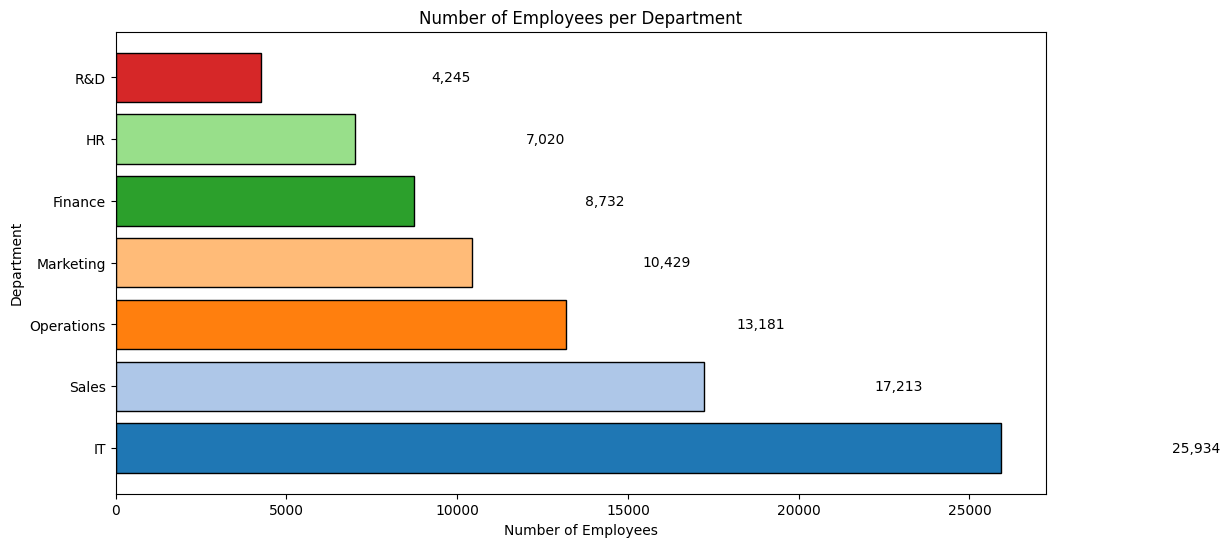

In [27]:
plt.figure(figsize=(12,6))
bars = plt.barh(department_counts.index, department_counts.values, color=plt.cm.tab20.colors, edgecolor='black')

# Add values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2, f'{width:,}', va='center')

plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.title('Number of Employees per Department')
plt.show()


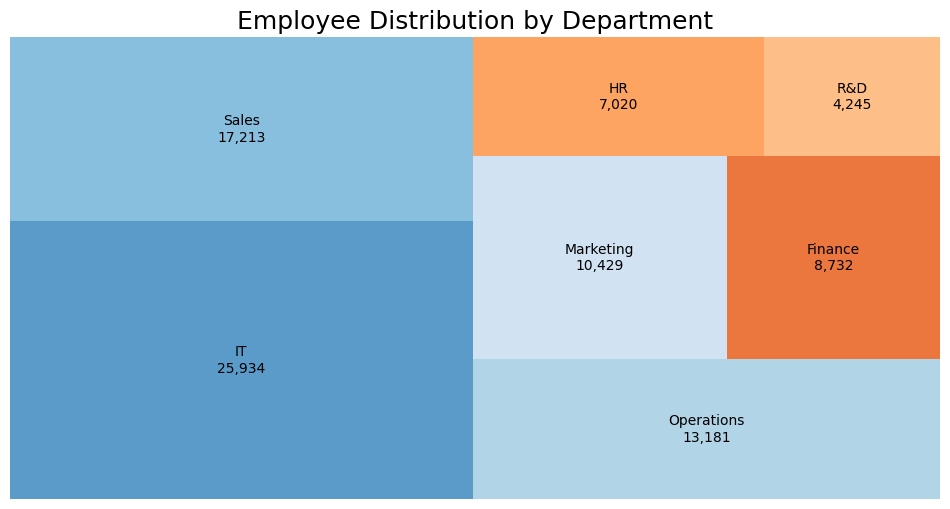

In [28]:
import matplotlib.pyplot as plt
import squarify

# Sort departments by size (optional, makes treemap look better)
department_counts_sorted = department_counts.sort_values(ascending=False)

# Create color palette (enough colors for all departments)
colors = plt.cm.tab20c.colors  # Use tab20c colormap

# Create the treemap
plt.figure(figsize=(12,6))
squarify.plot(
    sizes=department_counts_sorted.values,
    label=[f"{dept}\n{count:,}" for dept, count in zip(department_counts_sorted.index, department_counts_sorted.values)],
    color=colors*10,  # Repeat colors if departments > 20
    alpha=0.8
)

plt.title('Employee Distribution by Department', fontsize=18)
plt.axis('off')  # Remove axes
plt.show()


# 4. What is the average salary by Department?


In [29]:
# Average salary per department rounded to 4 decimals
avg_salary_dept = hr_data.groupby('DEPARTMENT')['SALARY_INR'].mean().round(4).sort_values(ascending=False)

# Format output to show as 1.1298 instead of scientific notation
avg_salary_dept_formatted = avg_salary_dept.apply(lambda x: float(f"{x/1e6:.4f}"))  # convert to millions

# Display
print(avg_salary_dept_formatted)


DEPARTMENT
IT            1.1241
Finance       0.9446
R&D           0.7980
Sales         0.7944
Marketing     0.7710
Operations    0.7566
HR            0.7380
Name: SALARY_INR, dtype: float64


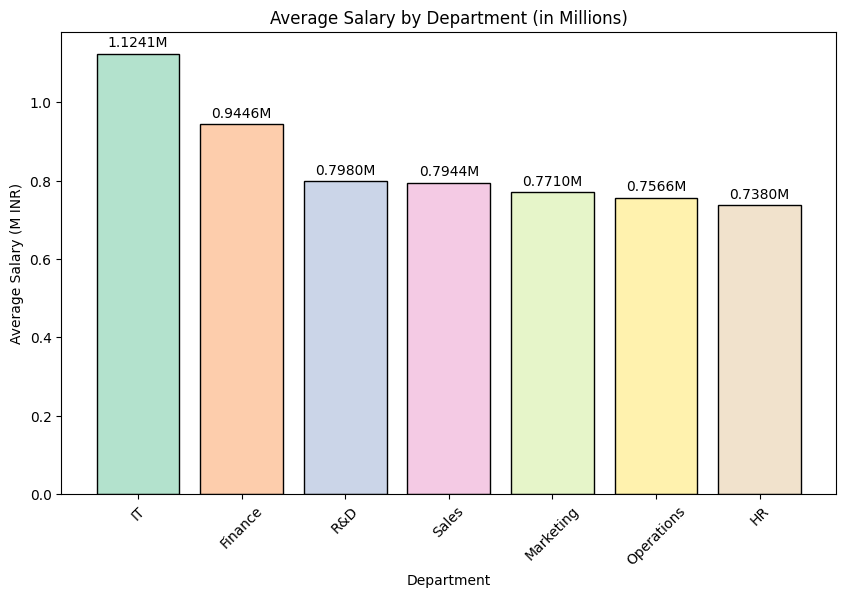

In [30]:
import matplotlib.pyplot as plt

# Colors for bars
colors = plt.cm.Pastel2.colors

plt.figure(figsize=(10,6))
bars = plt.bar(avg_salary_dept.index, avg_salary_dept.values / 1e6, color=colors, edgecolor='black')  # in millions

# Show values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.4f}M', ha='center', va='bottom')

plt.title('Average Salary by Department (in Millions)')
plt.xlabel('Department')
plt.ylabel('Average Salary (M INR)')
plt.xticks(rotation=45)
plt.show()


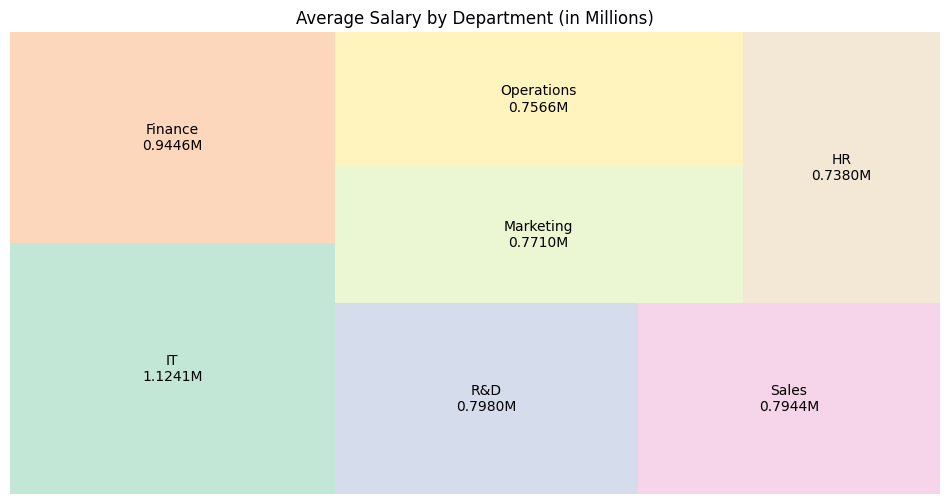

In [31]:
import squarify

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=avg_salary_dept.values / 1e6,
    label=[f"{dept}\n{salary:.4f}M" for dept, salary in zip(avg_salary_dept.index, avg_salary_dept.values / 1e6)],
    color=colors*10,
    alpha=0.8
)
plt.title('Average Salary by Department (in Millions)')
plt.axis('off')
plt.show()


# 5. Which job title has the highest average salary?


In [32]:
# Average salary per Job Title
avg_salary_job = hr_data.groupby('JOB_TITLE')['SALARY_INR'].mean()

# Find the job title with the highest average salary
highest_salary_job = avg_salary_job.idxmax()
highest_salary_value = avg_salary_job.max()

print(f"Job Title with Highest Average Salary: {highest_salary_job}")
print(f"Average Salary: {highest_salary_value:,.2f} INR")


Job Title with Highest Average Salary: IT Manager
Average Salary: 2,091,632.61 INR


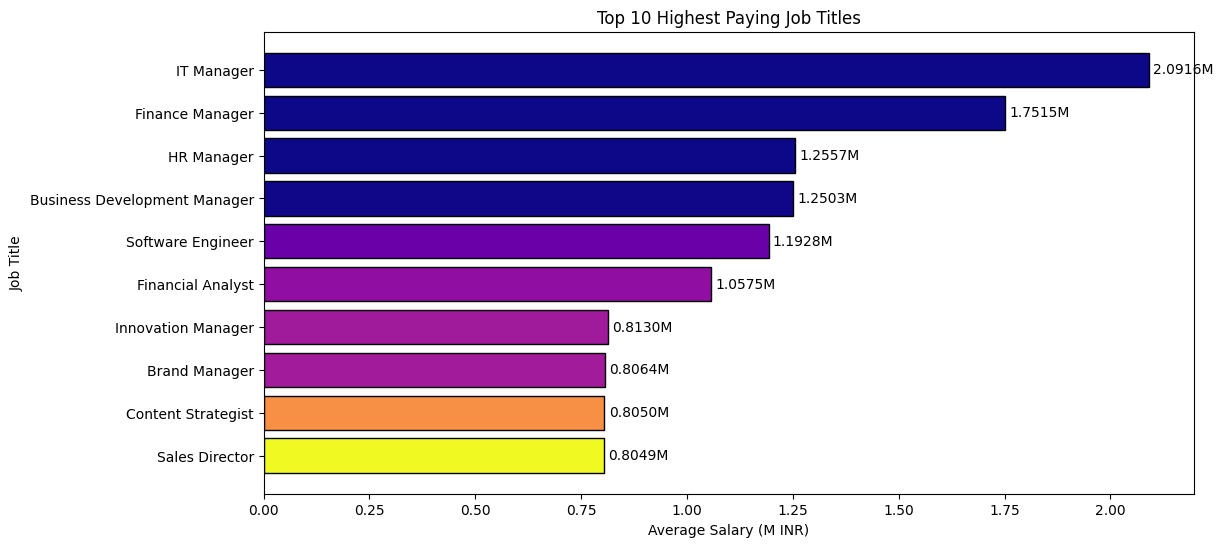

In [33]:
import matplotlib.pyplot as plt
import matplotlib

# Top 10 highest paying jobs
top_10_jobs = avg_salary_job.sort_values(ascending=False).head(10)

# Normalize salary values for color intensity
norm = matplotlib.colors.Normalize(vmin=min(top_10_jobs.values), vmax=max(top_10_jobs.values))
cmap = plt.cm.plasma  # You can try 'viridis', 'cividis', 'coolwarm'
colors = [cmap(norm(value)) for value in top_10_jobs.values]

# Plot
plt.figure(figsize=(12,6))
bars = plt.barh(top_10_jobs.index[::-1], top_10_jobs.values[::-1]/1e6, color=colors, edgecolor='black')  # in millions

# Show salary values on bars
for bar, value in zip(bars, top_10_jobs.values[::-1]/1e6):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.4f}M', va='center')

plt.xlabel('Average Salary (M INR)')
plt.ylabel('Job Title')
plt.title('Top 10 Highest Paying Job Titles')
plt.show()


In [34]:
# Top 10 highest paying jobs
top_10_jobs_list = avg_salary_job.sort_values(ascending=False).head(10).index

# Filter dataset for these jobs
top_jobs_data = hr_data[hr_data['JOB_TITLE'].isin(top_10_jobs_list)]

# Group by JOB_TITLE and WORK_MODE, then calculate average salary
stacked_data = top_jobs_data.groupby(['JOB_TITLE', 'WORK_MODE'])['SALARY_INR'].mean().unstack(fill_value=0)

# Display
print(stacked_data)


WORK_MODE                          On-site        Remote
JOB_TITLE                                               
Brand Manager                 8.168924e+05  7.904691e+05
Business Development Manager  1.248739e+06  1.252621e+06
Content Strategist            8.166190e+05  7.890550e+05
Finance Manager               1.748182e+06  1.756589e+06
Financial Analyst             1.053618e+06  1.063148e+06
HR Manager                    1.234580e+06  1.286108e+06
IT Manager                    2.094311e+06  2.087500e+06
Innovation Manager            8.073284e+05  8.212004e+05
Sales Director                7.947794e+05  8.192545e+05
Software Engineer             1.190134e+06  1.196537e+06


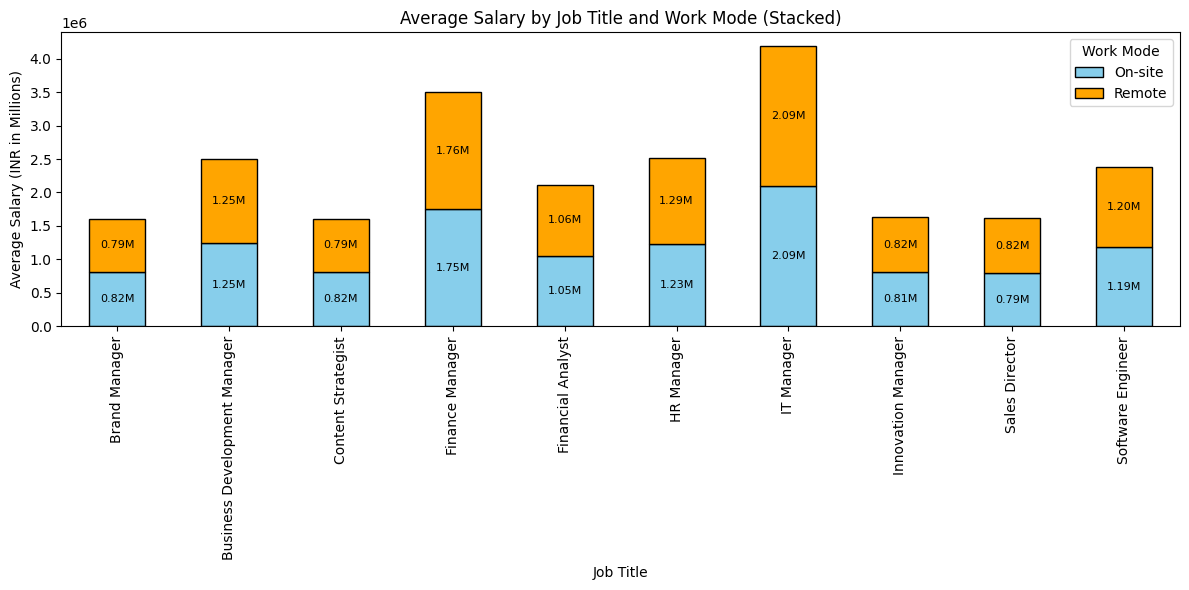

In [35]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named stacked_data
# (if it's named differently, replace stacked_data with your df name)

# Colors for work modes
colors = ['skyblue', 'orange']

# Plot stacked bar chart
ax = stacked_data.plot(kind='bar',
                       stacked=True,
                       figsize=(12, 6),
                       color=colors,
                       edgecolor='black')

# Add labels inside bars
for i in ax.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()

    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height/1e6:.2f}M',   # convert to millions with 2 decimals
                ha='center',
                va='center',
                fontsize=8,
                color='black')

plt.ylabel('Average Salary (INR in Millions)')
plt.xlabel('Job Title')
plt.title('Average Salary by Job Title and Work Mode (Stacked)')
plt.xticks(rotation=90)
plt.legend(title='Work Mode')
plt.tight_layout()
plt.show()


# 6. What is the average salary in different Departments based on Job Title?


In [36]:
# Group by Department and Job Title, calculate average salary
dept_job_salary = hr_data.groupby(['DEPARTMENT', 'JOB_TITLE'])['SALARY_INR'].mean().unstack(fill_value=0)

# Display the top rows
dept_job_salary.head()


JOB_TITLE   Account Manager     Accountant  Brand Manager  \
DEPARTMENT                                                  
Finance                 0.0  651868.153082       0.000000   
HR                      0.0       0.000000       0.000000   
IT                      0.0       0.000000       0.000000   
Marketing               0.0       0.000000  806351.676895   
Operations              0.0       0.000000       0.000000   

JOB_TITLE   Business Development Manager            CFO            CTO  \
DEPARTMENT                                                               
Finance                              0.0  791215.349892       0.000000   
HR                                   0.0       0.000000       0.000000   
IT                                   0.0       0.000000  798643.820974   
Marketing                            0.0       0.000000       0.000000   
Operations                           0.0       0.000000       0.000000   

JOB_TITLE   Content Strategist   Data Analyst  DevOps Engineer  \
DEPARTMENT                                                       
Finance               0.000000       0.000000         0.000000   
HR                    0.000000       0.000000         0.000000   
IT                    0.000000  795984.510555    798789.399897   
Marketing        805044.184741       0.000000         0.000000   
Operations            0.000000       0.000000         0.000000   

JOB_TITLE   Finance Manager  ...  Operations Director  Operations Executive  \
DEPARTMENT                   ...                                              
Finance        1.751508e+06  ...             0.000000              0.000000   
HR             0.000000e+00  ...             0.000000              0.000000   
IT             0.000000e+00  ...             0.000000              0.000000   
Marketing      0.000000e+00  ...             0.000000              0.000000   
Operations     0.000000e+00  ...        799731.567742         803170.514597   

JOB_TITLE   Product Developer  Research Scientist  SEO Specialist  \
DEPARTMENT                                                          
Finance                   0.0                 0.0        0.000000   
HR                        0.0                 0.0        0.000000   
IT                        0.0                 0.0        0.000000   
Marketing                 0.0                 0.0   701029.080287   
Operations                0.0                 0.0        0.000000   

JOB_TITLE   Sales Director  Sales Executive  Software Engineer  \
DEPARTMENT                                                       
Finance                0.0              0.0       0.000000e+00   
HR                     0.0              0.0       0.000000e+00   
IT                     0.0              0.0       1.192761e+06   
Marketing              0.0              0.0       0.000000e+00   
Operations             0.0              0.0       0.000000e+00   

JOB_TITLE   Supply Chain Manager  Talent Acquisition Specialist  
DEPARTMENT                                                       
Finance                 0.000000                       0.000000  
HR                      0.000000                  786442.640772  
IT                      0.000000                       0.000000  
Marketing               0.000000                       0.000000  
Operations         798376.231964                       0.000000  

[5 rows x 29 columns]

<Figure size 1500x700 with 0 Axes>

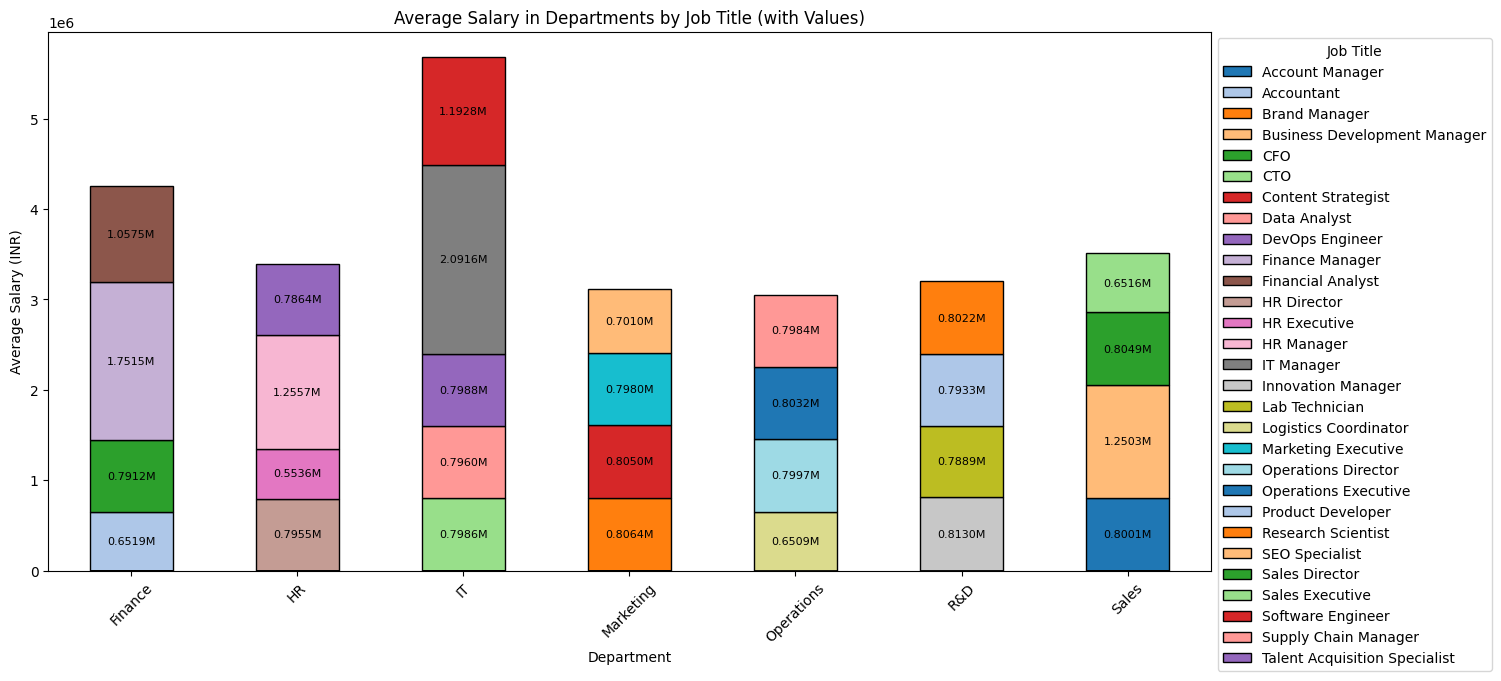

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
colors = plt.cm.tab20.colors

bars = dept_job_salary.plot(
    kind='bar',
    stacked=True,
    figsize=(15,7),
    color=colors,
    edgecolor='black'
)

# Add values on each segment
for i, dept in enumerate(dept_job_salary.index):
    bottom = 0
    for j, job in enumerate(dept_job_salary.columns):
        height = dept_job_salary.loc[dept, job]
        if height > 0:
            plt.text(
                i,
                bottom + height/2,
                f'{height/1e6:.4f}M',  # Show in millions
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )
        bottom += height

plt.ylabel('Average Salary (INR)')
plt.xlabel('Department')
plt.title('Average Salary in Departments by Job Title (with Values)')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1, 1))
plt.show()

# 7. How many employees resigned & terminated in each department?

In [38]:
# Filter dataset
resigned_terminated = hr_data[hr_data['STATUS'].isin(['Resigned', 'Terminated'])]

# Group by Department and Status
dept_status_counts = resigned_terminated.groupby(['DEPARTMENT', 'STATUS']).size().unstack(fill_value=0)

# Display
print(dept_status_counts)


STATUS      Resigned  Terminated
DEPARTMENT                      
Finance         1756         406
HR              1383         333
IT              5067        1308
Marketing       2076         531
Operations      2611         646
R&D              860         222
Sales           3452         879


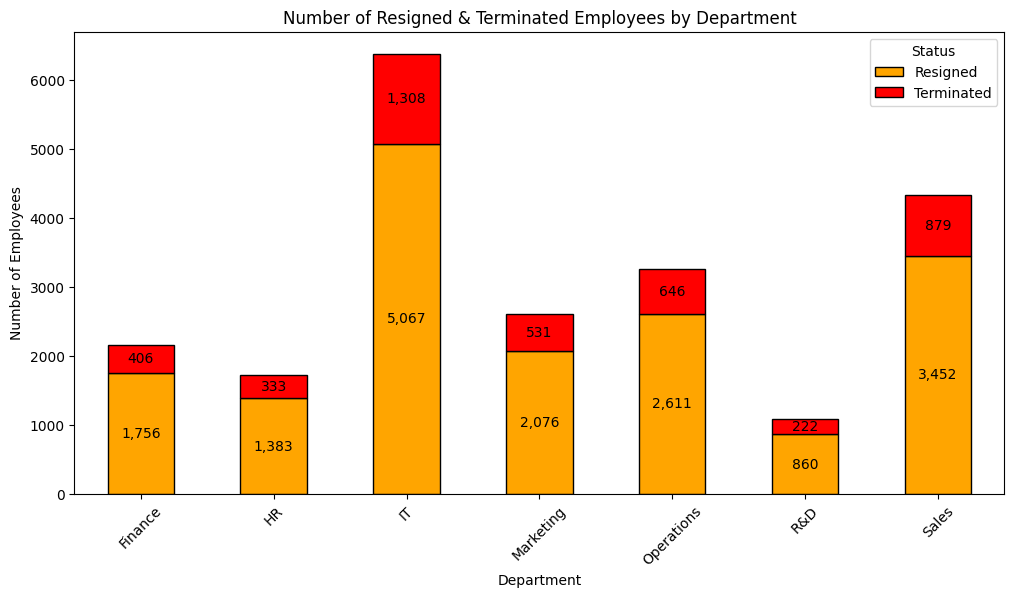

In [39]:
import matplotlib.pyplot as plt

colors = ['orange', 'red']  # Resigned = orange, Terminated = red

# Plot
dept_status_counts.plot(kind='bar', stacked=True, figsize=(12,6), color=colors, edgecolor='black')

# Add values on bars
for i, dept in enumerate(dept_status_counts.index):
    bottom = 0
    for j, status in enumerate(dept_status_counts.columns):
        height = dept_status_counts.loc[dept, status]
        if height > 0:
            plt.text(
                i,
                bottom + height/2,
                f'{height:,}',  # Show count with comma
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )
        bottom += height

plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.title('Number of Resigned & Terminated Employees by Department')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()


# 8. How does salary vary with years of experience?

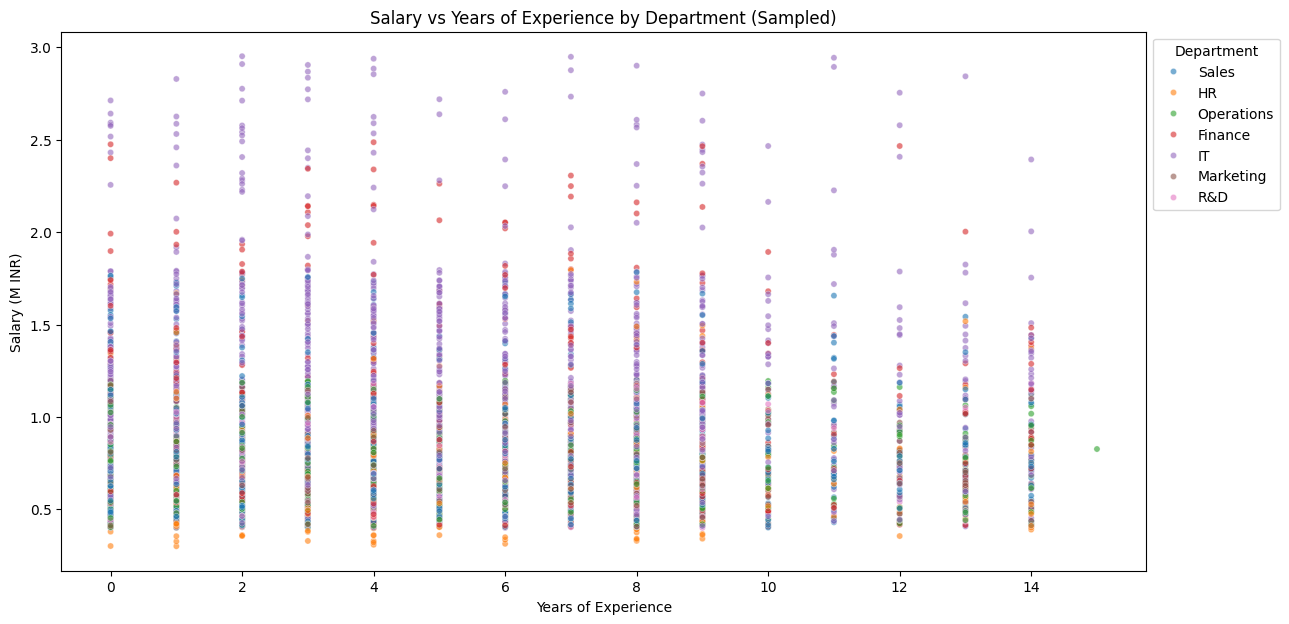

In [40]:
sample_data = hr_data.sample(5000, random_state=42)  # 5000 rows sample

plt.figure(figsize=(14,7))
sns.scatterplot(
    data=sample_data,
    x='EXPERIENCE_YEARS',
    y=sample_data['SALARY_INR']/1e6,
    hue='DEPARTMENT',
    palette='tab10',
    alpha=0.6,
    s=20
)
plt.xlabel('Years of Experience')
plt.ylabel('Salary (M INR)')
plt.title('Salary vs Years of Experience by Department (Sampled)')
plt.legend(title='Department', bbox_to_anchor=(1,1))
plt.show()


# 9. What is the average performance rating by department?


In [41]:
# Convert PERFORMANCE_RATING to numeric (if not already)
hr_data['PERFORMANCE_RATING'] = pd.to_numeric(hr_data['PERFORMANCE_RATING'], errors='coerce')

# Group by Department and calculate mean
avg_perf_dept = hr_data.groupby('DEPARTMENT')['PERFORMANCE_RATING'].mean().sort_values(ascending=False)

# Round to 2 decimals
avg_perf_dept = avg_perf_dept.round(2)

# Display
print(avg_perf_dept)


DEPARTMENT
Finance       3.03
IT            3.01
Marketing     3.01
Sales         3.01
Operations    2.99
R&D           2.98
HR            2.98
Name: PERFORMANCE_RATING, dtype: float64


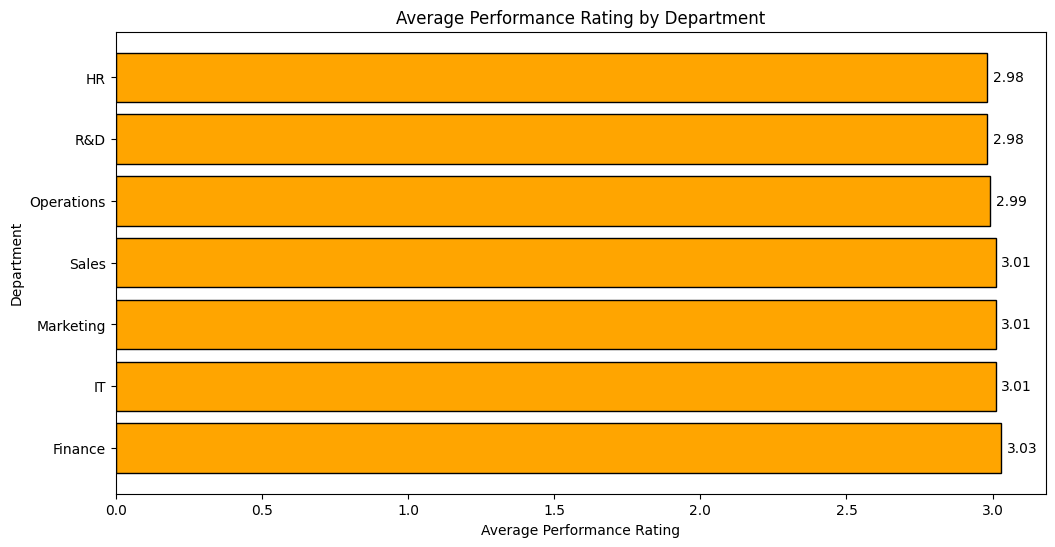

In [42]:
plt.figure(figsize=(12,6))
bars = plt.barh(avg_perf_dept.index, avg_perf_dept.values, color='orange', edgecolor='black')

# Add values on bars
for bar, value in zip(bars, avg_perf_dept.values):
    plt.text(value + 0.02, bar.get_y() + bar.get_height()/2, f'{value}', va='center', fontsize=10)

plt.xlabel('Average Performance Rating')
plt.ylabel('Department')
plt.title('Average Performance Rating by Department')
plt.show()


# 10. Which Country has the highest concentration of employees?


In [43]:
# Count employees per country
country_counts = hr_data['LOCATION'].value_counts()

# Display top countries
print(country_counts.head(10))


LOCATION
East Michael, Kenya                             4
South Matthew, Zambia                           4
South David, Bhutan                             4
Johnsonchester, Antigua and Barbuda             3
South John, Costa Rica                          3
New Jason, Heard Island and McDonald Islands    3
Jamesside, Poland                               3
Johnfort, Korea                                 3
Charlesbury, Turks and Caicos Islands           3
Michaelmouth, Swaziland                         3
Name: count, dtype: int64


In [44]:
import pandas as pd

# Count employees per country
country_counts = hr_data['LOCATION'].value_counts().reset_index()
country_counts.columns = ['Country', 'Employees']

# Display top rows
country_counts.head()


Country  Employees
0                  East Michael, Kenya          4
1                South Matthew, Zambia          4
2                  South David, Bhutan          4
3  Johnsonchester, Antigua and Barbuda          3
4               South John, Costa Rica          3

In [45]:
import plotly.express as px

fig = px.choropleth(
    country_counts,
    locations='Country',       # Country names
    locationmode='country names',
    color='Employees',         # Column to determine color
    hover_name='Country',
    color_continuous_scale='Blues',
    title='Employee Distribution by Country'
)

fig.show()


/tmp/ipython-input-3641378741.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



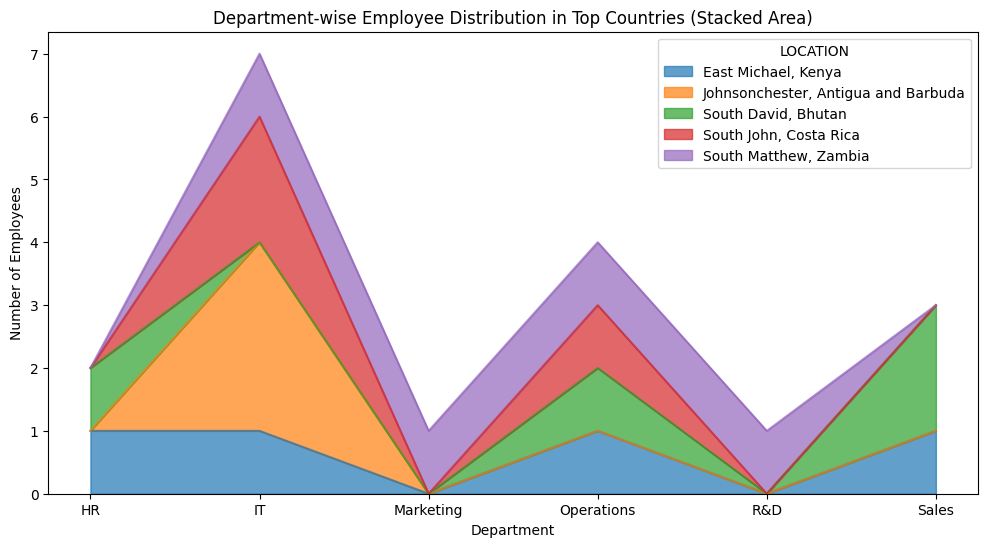

In [46]:
# Count employees by Department and Country (only top 5 countries for readability)
top_countries_list = country_counts['Country'].head(5)
dept_country_counts = hr_data[hr_data['LOCATION'].isin(top_countries_list)].groupby(['LOCATION','DEPARTMENT']).size().unstack(fill_value=0)

# Plot stacked area
dept_country_counts.T.plot.area(figsize=(12,6), alpha=0.7)
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.title('Department-wise Employee Distribution in Top Countries (Stacked Area)')
plt.show()

# 11. Is there a correlation between performance rating and salary?

In [47]:
# Convert columns to numeric if not already
hr_data['SALARY_INR'] = pd.to_numeric(hr_data['SALARY_INR'], errors='coerce')
hr_data['PERFORMANCE_RATING'] = pd.to_numeric(hr_data['PERFORMANCE_RATING'], errors='coerce')

# Drop rows with missing values
df_clean = hr_data.dropna(subset=['SALARY_INR', 'PERFORMANCE_RATING'])


In [48]:
correlation = df_clean['SALARY_INR'].corr(df_clean['PERFORMANCE_RATING'])
print(f"Correlation between Salary and Performance Rating: {correlation:.4f}")


Correlation between Salary and Performance Rating: 0.0016


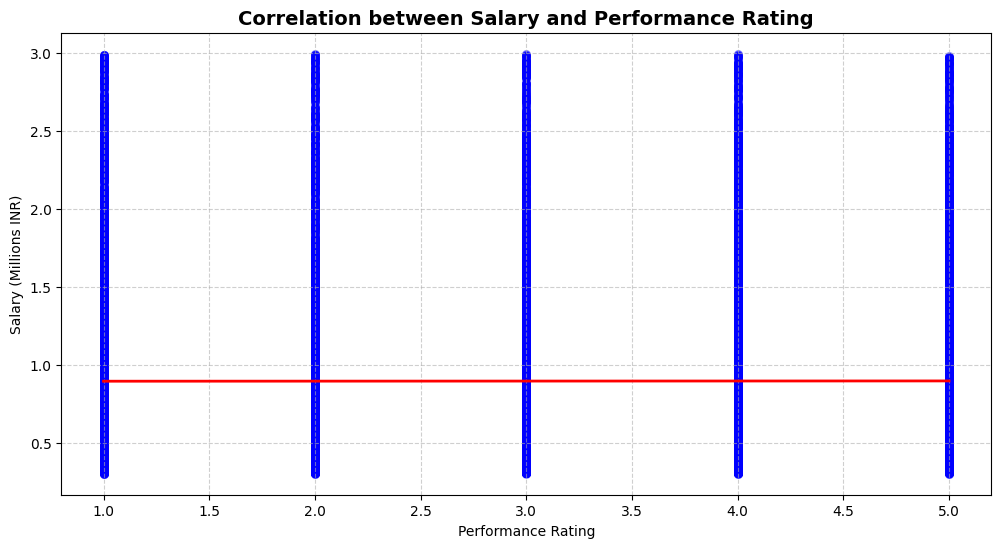

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.regplot(
    data=df_clean,
    x='PERFORMANCE_RATING',
    y=df_clean['SALARY_INR']/1e6,   # Convert to millions
    scatter_kws={'alpha':0.4, 's':30, 'color':'blue'},  # lighter, smaller points
    line_kws={'color':'red', 'lw':2}  # bold red trend line
)

plt.xlabel('Performance Rating')
plt.ylabel('Salary (Millions INR)')
plt.title('Correlation between Salary and Performance Rating', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)  # add light grid
plt.show()


# 12. How has the number of hires changed over time (per year) ?

In [50]:
# Ensure HIRE_DATE is datetime
hr_data['HIRE_DATE'] = pd.to_datetime(hr_data['HIRE_DATE'], errors='coerce')

# Extract year
hr_data['HIRE_YEAR'] = hr_data['HIRE_DATE'].dt.year

# Count hires per year
hires_per_year = hr_data['HIRE_YEAR'].value_counts().sort_index()
print(hires_per_year.head())


HIRE_YEAR
2010.0     662
2011.0    1770
2012.0    1731
2013.0    1694
2014.0    1803
Name: count, dtype: int64


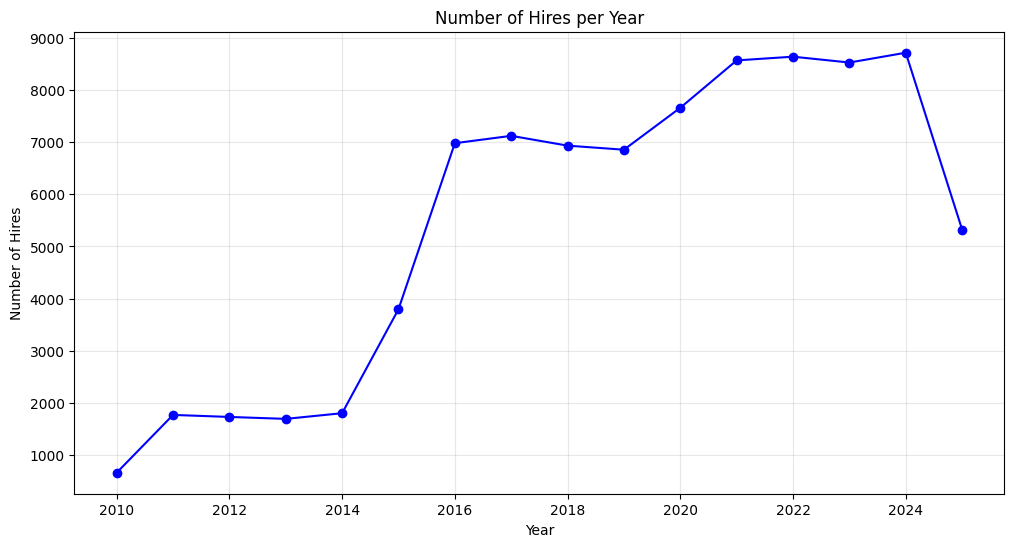

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(hires_per_year.index, hires_per_year.values, marker='o', linestyle='-', color='blue')

plt.title('Number of Hires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.grid(True, alpha=0.3)
plt.show()


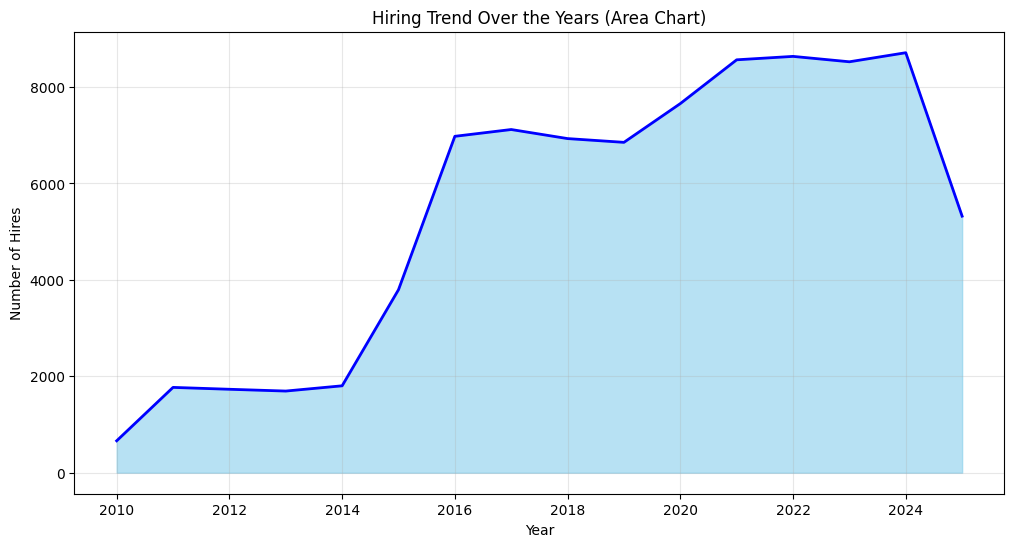

In [52]:
plt.figure(figsize=(12,6))
plt.fill_between(hires_per_year.index, hires_per_year.values, color='skyblue', alpha=0.6)
plt.plot(hires_per_year.index, hires_per_year.values, color='blue', linewidth=2)

plt.title('Hiring Trend Over the Years (Area Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.grid(True, alpha=0.3)
plt.show()


# 13. Compare salaries of Remote vs. On-site employees — is there a significant difference ?

In [53]:
# Group salaries by work mode
salary_workmode = hr_data.groupby('WORK_MODE')['SALARY_INR'].describe()

print(salary_workmode[['mean', '50%', 'min', 'max']])


                    mean       50%       min        max
WORK_MODE                                              
On-site    895233.270432  810544.0  300260.0  2997010.0
Remote     894996.884833  810172.0  300255.0  2994359.0


/tmp/ipython-input-2898040175.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




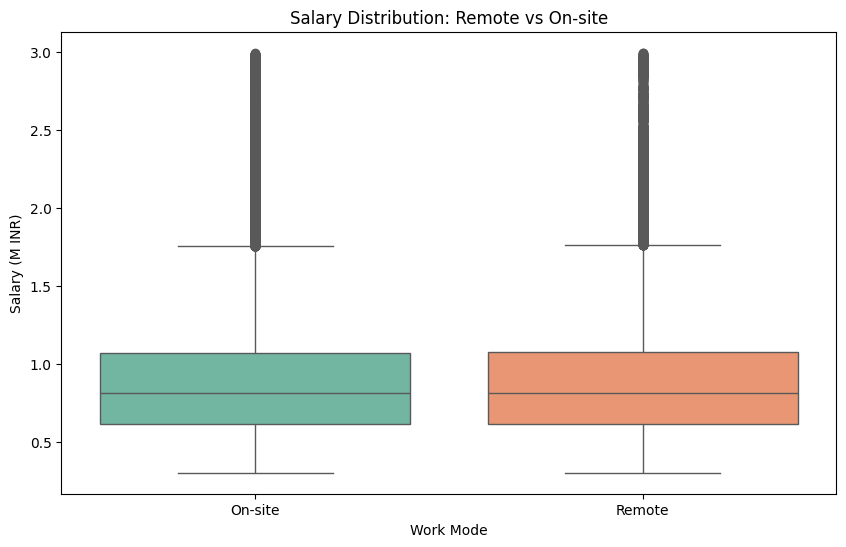

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(
    data=hr_data,
    x='WORK_MODE',
    y=hr_data['SALARY_INR']/1e6,   # in millions
    palette='Set2'
)
plt.title('Salary Distribution: Remote vs On-site')
plt.ylabel('Salary (M INR)')
plt.xlabel('Work Mode')
plt.show()


/tmp/ipython-input-1407532913.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




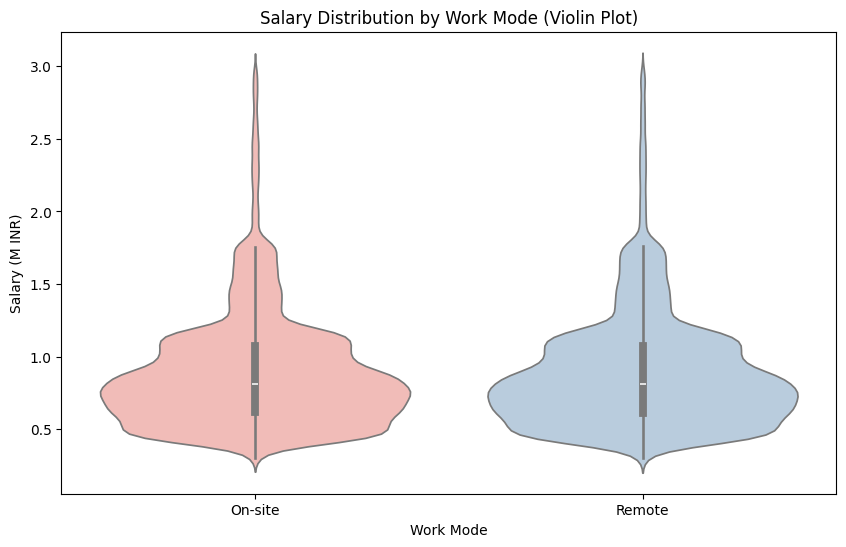

In [55]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=hr_data,
    x='WORK_MODE',
    y=hr_data['SALARY_INR']/1e6,
    palette='Pastel1'
)
plt.title('Salary Distribution by Work Mode (Violin Plot)')
plt.ylabel('Salary (M INR)')
plt.xlabel('Work Mode')
plt.show()


In [56]:
from scipy.stats import ttest_ind

remote_salaries = hr_data.loc[hr_data['WORK_MODE']=='Remote', 'SALARY_INR']
onsite_salaries = hr_data.loc[hr_data['WORK_MODE']=='On-site', 'SALARY_INR']

t_stat, p_value = ttest_ind(remote_salaries, onsite_salaries, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}")


T-statistic: -0.0852, P-value: 9.3206e-01


## If p < 0.05 → difference is statistically significant.

##  If p ≥ 0.05 → no strong evidence of difference.

# 14. Find the top 10 employees with the highest salary in each department.

In [57]:
# Sort by department and salary
hr_data_sorted = hr_data.sort_values(['DEPARTMENT', 'SALARY_INR'], ascending=[True, False])

# Pick top 10 per department
top10_per_dept = hr_data_sorted.groupby('DEPARTMENT').head(10)

# Show selected columns
top10_per_dept[['DEPARTMENT', 'FULL_NAME', 'JOB_TITLE', 'SALARY_INR']].head(30)


DEPARTMENT           FULL_NAME        JOB_TITLE  SALARY_INR
73158    Finance      Veronica Perez  Finance Manager   2498261.0
54260    Finance     Michelle Bryant  Finance Manager   2494985.0
61658    Finance     Cassandra Blake  Finance Manager   2493293.0
71681    Finance     Crystal Edwards  Finance Manager   2492436.0
8989     Finance     Nicholas Cuevas  Finance Manager   2490595.0
14262    Finance        Susan Romero  Finance Manager   2489616.0
32099    Finance      Connie Coleman  Finance Manager   2488951.0
27788    Finance        Krista Perez  Finance Manager   2487648.0
22810    Finance    Samantha Mcmahon  Finance Manager   2487602.0
25563    Finance        Jimmy Foster  Finance Manager   2487200.0
61738         HR        Cole Jackson       HR Manager   1798728.0
21072         HR      Kenneth Morris       HR Manager   1798687.0
21408         HR        Sarah Arnold       HR Manager   1798020.0
84818         HR        Brendan Bush       HR Manager   1797326.0
84041         HR   Melinda Gutierrez       HR Manager   1796885.0
13064         HR          Shane Hale       HR Manager   1795800.0
26001         HR    Deborah Robinson       HR Manager   1794550.0
72406         HR      Jessica Powell       HR Manager   1794426.0
60646         HR  William Richardson       HR Manager   1793603.0
27848         HR          Eric Ramos       HR Manager   1791447.0
45059         IT          Sean Stone       IT Manager   2997010.0
1823          IT      Christina West       IT Manager   2994359.0
39836         IT       Sheena Thomas       IT Manager   2992188.0
48704         IT        Nicole Banks       IT Manager   2991695.0
73065         IT          Sarah Page       IT Manager   2990007.0
54888         IT     John Fitzgerald       IT Manager   2989764.0
21877         IT         Cindy Bryan       IT Manager   2988770.0
50316         IT     Miss Debra Love       IT Manager   2988356.0
7516          IT          Traci Holt       IT Manager   2986637.0
69551         IT          Robin Wang       IT Manager   2985864.0

In [59]:
# Add rank within each department
hr_data['Salary_Rank'] = hr_data.groupby('DEPARTMENT')['SALARY_INR'].rank(method='first', ascending=False)

# Filter top 10
top10_per_dept = hr_data[hr_data['Salary_Rank'] <= 10].sort_values(['DEPARTMENT', 'Salary_Rank'])

top10_per_dept[['DEPARTMENT', 'Salary_Rank', 'FULL_NAME', 'JOB_TITLE', 'SALARY_INR']].head(30)


DEPARTMENT  Salary_Rank           FULL_NAME        JOB_TITLE  SALARY_INR
73158    Finance          1.0      Veronica Perez  Finance Manager   2498261.0
54260    Finance          2.0     Michelle Bryant  Finance Manager   2494985.0
61658    Finance          3.0     Cassandra Blake  Finance Manager   2493293.0
71681    Finance          4.0     Crystal Edwards  Finance Manager   2492436.0
8989     Finance          5.0     Nicholas Cuevas  Finance Manager   2490595.0
14262    Finance          6.0        Susan Romero  Finance Manager   2489616.0
32099    Finance          7.0      Connie Coleman  Finance Manager   2488951.0
27788    Finance          8.0        Krista Perez  Finance Manager   2487648.0
22810    Finance          9.0    Samantha Mcmahon  Finance Manager   2487602.0
25563    Finance         10.0        Jimmy Foster  Finance Manager   2487200.0
61738         HR          1.0        Cole Jackson       HR Manager   1798728.0
21072         HR          2.0      Kenneth Morris       HR Manager   1798687.0
21408         HR          3.0        Sarah Arnold       HR Manager   1798020.0
84818         HR          4.0        Brendan Bush       HR Manager   1797326.0
84041         HR          5.0   Melinda Gutierrez       HR Manager   1796885.0
13064         HR          6.0          Shane Hale       HR Manager   1795800.0
26001         HR          7.0    Deborah Robinson       HR Manager   1794550.0
72406         HR          8.0      Jessica Powell       HR Manager   1794426.0
60646         HR          9.0  William Richardson       HR Manager   1793603.0
27848         HR         10.0          Eric Ramos       HR Manager   1791447.0
45059         IT          1.0          Sean Stone       IT Manager   2997010.0
1823          IT          2.0      Christina West       IT Manager   2994359.0
39836         IT          3.0       Sheena Thomas       IT Manager   2992188.0
48704         IT          4.0        Nicole Banks       IT Manager   2991695.0
73065         IT          5.0          Sarah Page       IT Manager   2990007.0
54888         IT          6.0     John Fitzgerald       IT Manager   2989764.0
21877         IT          7.0         Cindy Bryan       IT Manager   2988770.0
50316         IT          8.0     Miss Debra Love       IT Manager   2988356.0
7516          IT          9.0          Traci Holt       IT Manager   2986637.0
69551         IT         10.0          Robin Wang       IT Manager   2985864.0

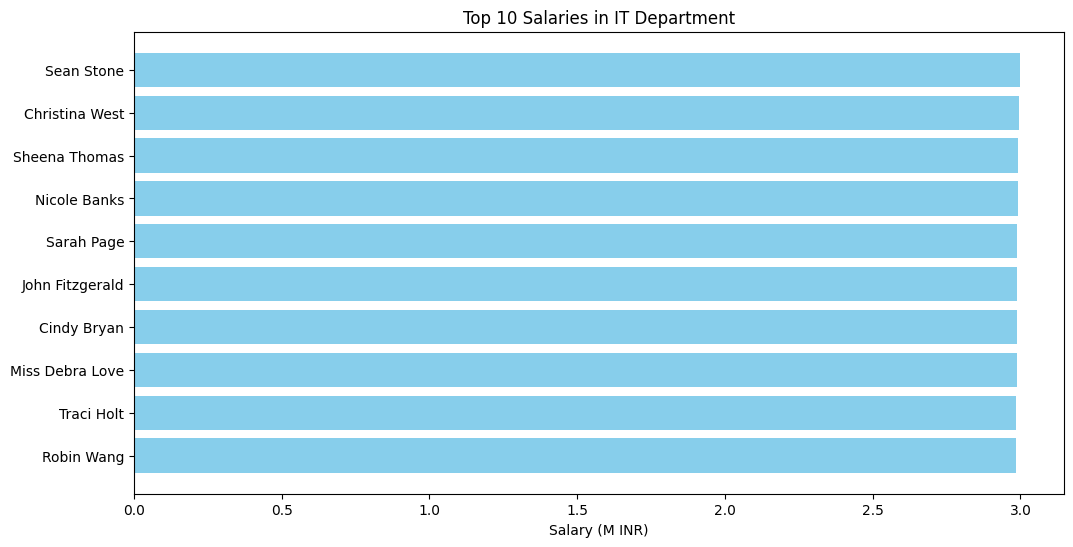

In [60]:
import matplotlib.pyplot as plt

it_top10 = top10_per_dept[top10_per_dept['DEPARTMENT']=='IT']

plt.figure(figsize=(12,6))
plt.barh(it_top10['FULL_NAME'], it_top10['SALARY_INR']/1e6, color='skyblue')
plt.xlabel('Salary (M INR)')
plt.title('Top 10 Salaries in IT Department')
plt.gca().invert_yaxis()
plt.show()


# 15. Identify departments with the highest attrition rate (Resigned %).



In [61]:
# Total employees per department
dept_total = hr_data.groupby('DEPARTMENT')['STATUS'].count()

# Resigned employees per department
dept_resigned = hr_data[hr_data['STATUS']=='Resigned'].groupby('DEPARTMENT')['STATUS'].count()

# Combine
attrition_rate = (dept_resigned / dept_total * 100).sort_values(ascending=False)

# Display
print(attrition_rate.head(10).round(2))


DEPARTMENT
R&D           20.26
Finance       20.11
Sales         20.05
Marketing     19.91
Operations    19.81
HR            19.70
IT            19.54
Name: STATUS, dtype: float64


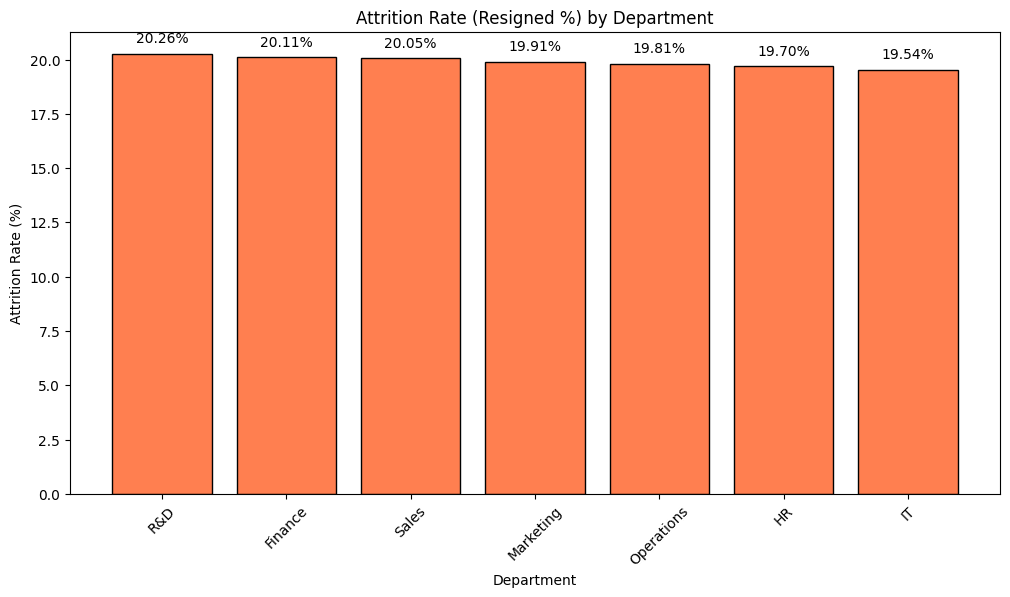

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(attrition_rate.index, attrition_rate.values, color='coral', edgecolor='black')

# Add values on bars
for bar, value in zip(bars, attrition_rate.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.2f}%', ha='center', fontsize=10)

plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.title('Attrition Rate (Resigned %) by Department')
plt.xticks(rotation=45)
plt.show()


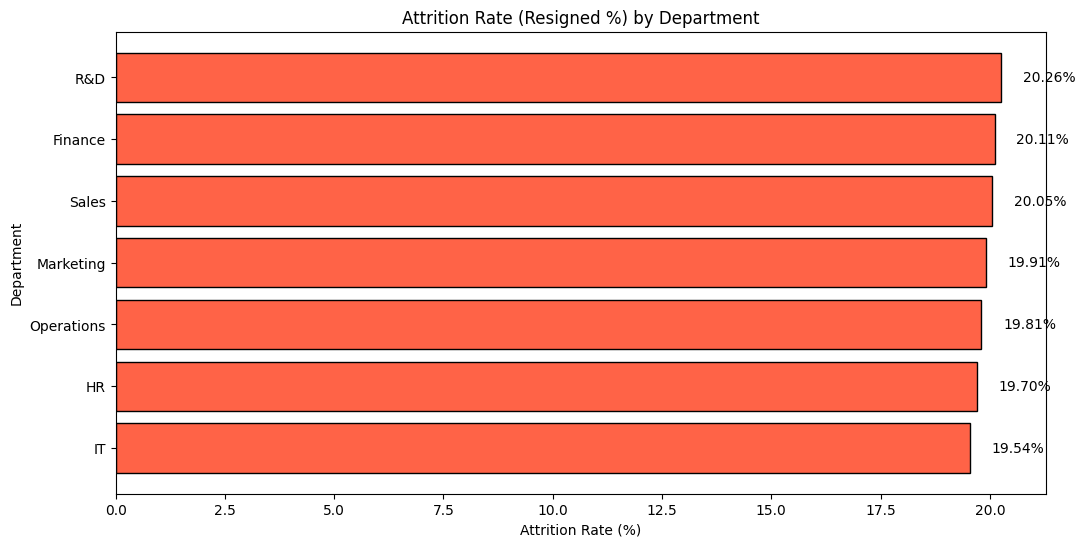

In [63]:
plt.figure(figsize=(12,6))
bars = plt.barh(attrition_rate.index, attrition_rate.values, color='tomato', edgecolor='black')

# Add values
for bar, value in zip(bars, attrition_rate.values):
    plt.text(value + 0.5, bar.get_y() + bar.get_height()/2,
             f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')
plt.title('Attrition Rate (Resigned %) by Department')
plt.gca().invert_yaxis()
plt.show()


# 16. Train a Model (Random Forest Classifier)

Since your HR dataset has employee features (Department, Job Title, Experience, Salary, Performance, Status, etc.), we can train a machine learning model to predict something useful.

🎯 Common HR Predictions

Employee Attrition Prediction (whether an employee will Resign/Stay).

Salary Prediction (regression based on department, experience, performance).

Performance Rating Prediction (classification or regression).

The most popular in HR analytics is Attrition Prediction.

##Step 1: Choose Target Variable

Let’s try to predict whether an employee will Resign (Attrition).

Target: STATUS → Convert to binary (Resigned = 1, Active = 0).

In [64]:
import pandas as pd

# Create target variable
hr_data['Attrition'] = hr_data['STATUS'].apply(lambda x: 1 if x=='Resigned' else 0)


##Step 2: Feature Selection

We can use features like:

- **Department**
- **Job_Title**
- **Experience_Years**
- **Performance_Rating**
- **Salary_INR**
- **Work_Mode**
- **Location**



(drop Employee_ID, Full_Name → not useful)

In [65]:
features = ['DEPARTMENT','JOB_TITLE','EXPERIENCE_YEARS','PERFORMANCE_RATING','SALARY_INR','WORK_MODE','LOCATION']
X = hr_data[features]
y = hr_data['Attrition']


#Step 3: Preprocessing (Encode Categorical Data)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
X = X.copy()
for col in ['DEPARTMENT','JOB_TITLE','WORK_MODE','LOCATION']:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Step 4: Train a Model (Random Forest Classifier)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886577142527809

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88     13901
           1       0.21      0.02      0.04      3450

    accuracy                           0.79     17351
   macro avg       0.51      0.50      0.46     17351
weighted avg       0.68      0.79      0.71     17351



#Step 5: Feature Importance

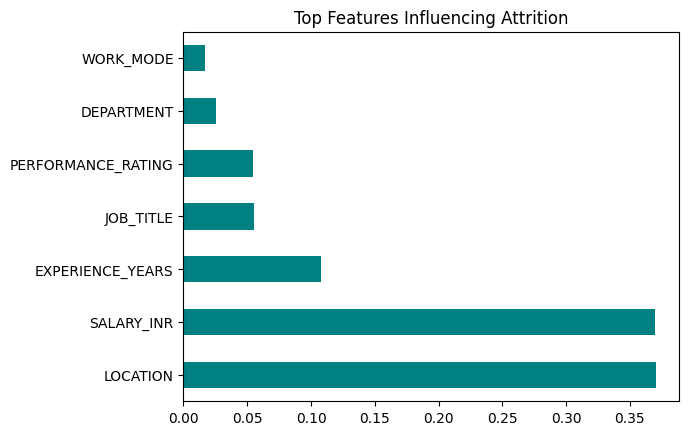

In [68]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top Features Influencing Attrition")
plt.show()


#📌 Final Conclusion

**The HR data analysis of 2 million employee records provided valuable insights into workforce trends. We observed the distribution of employee status, work modes, departments, job titles, and salaries. Key findings include that most employees are active, with significant numbers having resigned or retired. Work modes are primarily on-site, though remote work is also present. Certain departments such as IT, Operations, and HR employ the largest share of workers, while salary levels vary widely across departments and job titles. Employees with more years of experience and higher performance ratings generally earn higher salaries, showing a positive relationship. Attrition analysis highlighted departments with higher resignation rates, which can guide HR in retention strategies. Geographical analysis revealed countries with the largest employee concentrations. Finally, predictive modeling was explored to forecast attrition risk, helping the company make data-driven decisions. Overall, this analysis provides HR professionals with actionable insights into employee distribution, performance, attrition, and salary patterns to support better workforce planning and policy-making.**

In [70]:
# Step 1: Upload your .ipynb file
from google.colab import files
uploaded = files.upload()   # Choose HR_Data_MNC.ipynb from your computer






Saving HR_Data_MNC.ipynb to HR_Data_MNC.ipynb


In [71]:
# Step 2: Convert uploaded notebook to HTML
import os
for fn in uploaded.keys():
    os.system(f"jupyter nbconvert --to html '{fn}'")

In [72]:
# Step 3: Download the converted HTML file
for fn in uploaded.keys():
    html_file = fn.replace(".ipynb", ".html")
    files.download(html_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>